# Extragerea dimensiunilor faciale normalizate

Extragerea dimensiunilor faciale normalizate urmareste o metoda simpla de comparare a dimensiunilor faciale între mai multe persoane. Pentru aceasta, trebuie sa încercăm să folosim un sistem de referință cât de cât similar.

## Instalarea mediapipe



In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
grpcio-

In timpul execuției următoarelor trei linii se va solicita restartul sesiunii. Asteptați până se termină instalarea tuturor pachetelor si abia apoi reporniți sesiunea.

## Reinstalarea anumitor biblioteci pentru a elimina incompatibilitatile cu mediapipe.

In timpul execuției următoarelor trei linii se va solicita restartul sesiunii. Asteptați până se termină instalarea tuturor pachetelor si abia apoi reporniți sesiunea.

In [3]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall tensorflow
!pip install --upgrade --force-reinstall mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.7 MB/s e

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.5 MB/s eta 0:00:00
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached mediapipe-0.10.21-cp311-cp311-man

## Importul bibliotecilor principale

In [14]:
import cv2
import mediapipe as mp
import numpy as np
import math
import os
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow
import scipy

In [79]:
print("Incarcati o imagine de test")
uploaded_test_image = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_path = list(uploaded_test_image.keys())[0]

Incarcati o imagine de test


Saving pexels-shakar-fazel-698468136-18226149_700.jpg to pexels-shakar-fazel-698468136-18226149_700.jpg


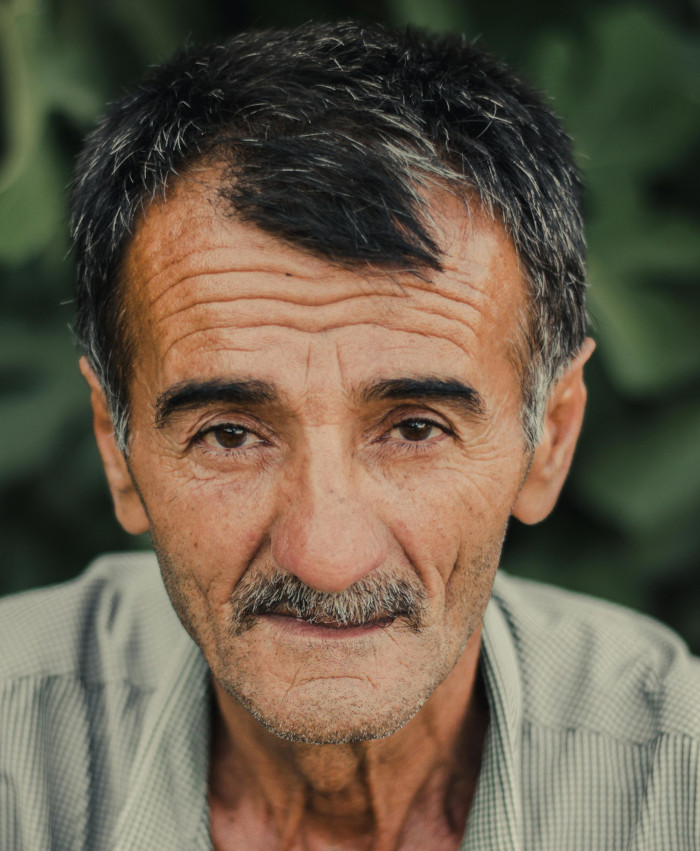

In [80]:
mp_face_mesh = mp.solutions.face_mesh
with mp_face_mesh.FaceMesh(static_image_mode=True,
                           max_num_faces=1,
                           refine_landmarks=True,
                           min_detection_confidence=0.5) as face_mesh:
   original_image = cv2.imread(uploaded_test_image_path)
   if original_image is None:
       print(f"Error: Could not open or find the image at {uploaded_test_image_path}")
   else:
       rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
       results = face_mesh.process(rgb_image)
       landmarks = results.multi_face_landmarks[0].landmark
       face_mesh = results.multi_face_landmarks[0]


cv2_imshow(original_image)


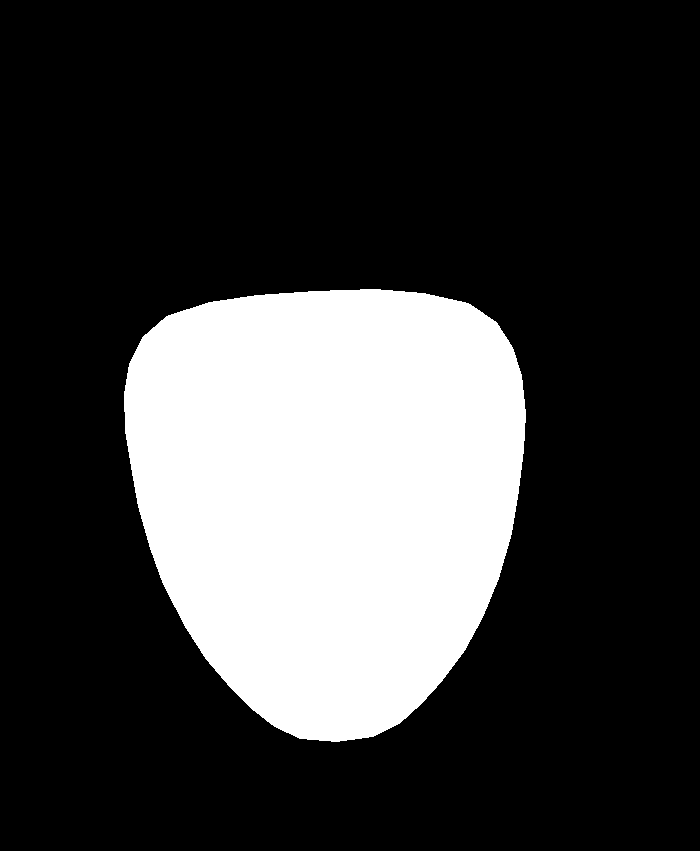

In [81]:
height, width, _ = original_image.shape
points = np.array([(int(lm.x * width), int(lm.y * height)) for lm in landmarks])
hull = cv2.convexHull(points)
mask = np.zeros((height, width), dtype=np.uint8)
cv2.drawContours(mask, [hull], -1, (255), thickness=cv2.FILLED)
cv2_imshow(mask)


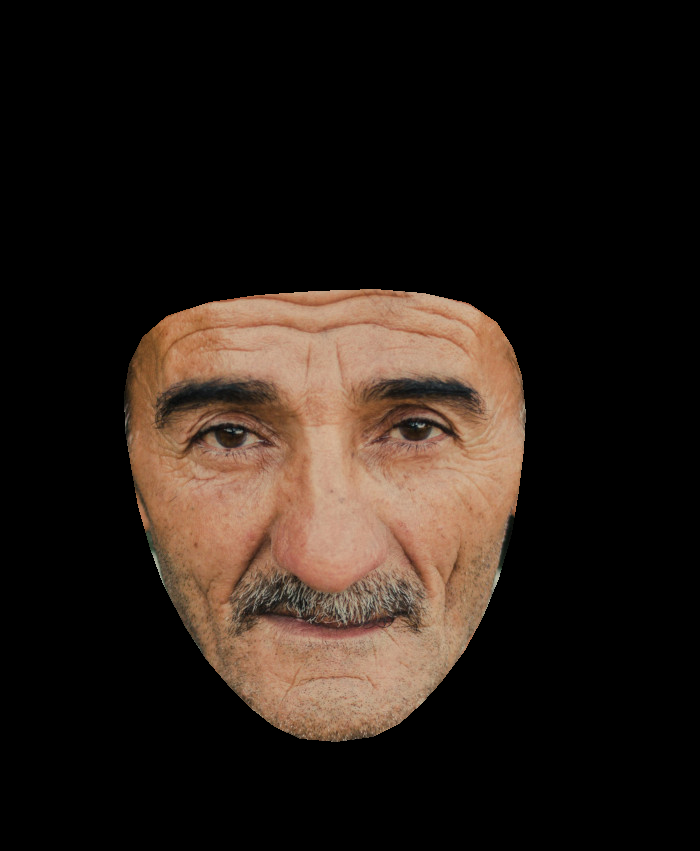

In [82]:
oval_face = cv2.bitwise_and(original_image, original_image, mask=mask)
cv2_imshow(oval_face)

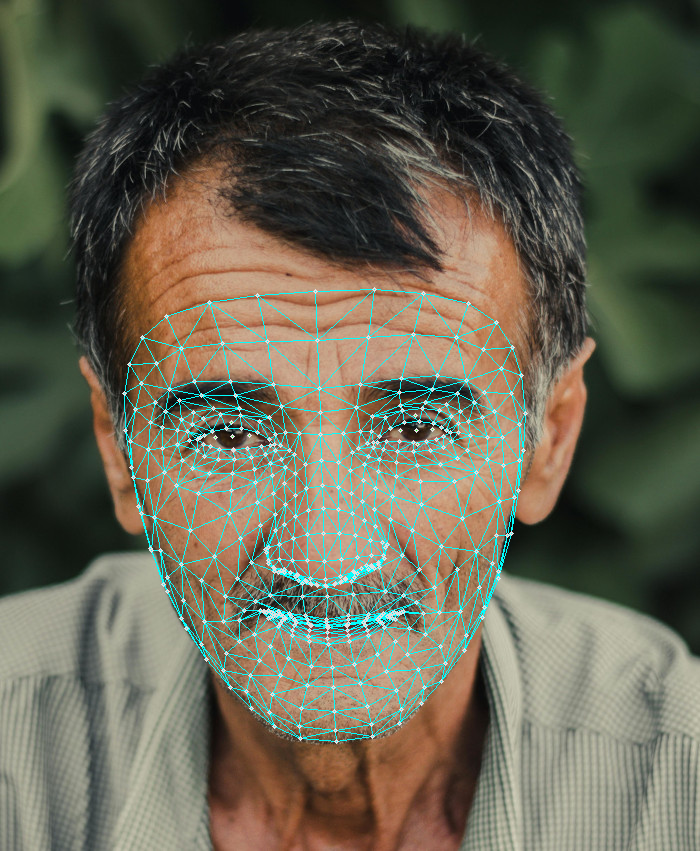

In [83]:
output_image = original_image.copy()
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Draw landmarks
for landmark in landmarks:
    x, y = int(landmark.x * original_image.shape[1]), int(landmark.y * original_image.shape[0])
    cv2.circle(output_image, (x, y), 2, (0, 255, 0), -1)

# Draw mesh
mp_drawing.draw_landmarks(
    image=output_image,
    landmark_list=face_mesh,
    connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
    landmark_drawing_spec=drawing_spec,
    connection_drawing_spec=mp_drawing.DrawingSpec(thickness=1, color=(255, 255, 0)))

cv2_imshow(output_image)

In [7]:
oval_indices = mp.solutions.face_mesh.FACEMESH_FACE_OVAL
oval_points = np.array([(landmarks[i[0]].x, landmarks[i[0]].y) for i in oval_indices])
center_x = np.mean(oval_points[:, 0])
center_y = np.mean(oval_points[:, 1])
distances = np.sqrt((oval_points[:, 0] - center_x)**2 + (oval_points[:, 1] - center_y)**2)
radius = np.max(distances)
normalized_landmarks = [( (lm.x - center_x) / radius, (lm.y - center_y) / radius ) for lm in landmarks]

In [27]:
oval_indices = mp.solutions.face_mesh.FACEMESH_FACE_OVAL
oval_points_orig = np.array([(landmarks[i[0]].x, landmarks[i[0]].y) for i in oval_indices])

# 1. Calculate the center of the original oval
center_x_orig = np.mean(oval_points_orig[:, 0])
center_y_orig = np.mean(oval_points_orig[:, 1])

# 2. Calculate the average radius of the original oval
distances = np.sqrt((oval_points_orig[:, 0] - center_x_orig)**2 + (oval_points_orig[:, 1] - center_y_orig)**2)
avg_radius_orig = np.mean(distances)

# 3. Place the deformed oval landmarks on a perfect circle
deformed_landmarks = [None] * len(landmarks)
original_landmarks = [None] * len(landmarks)
for i, index_pair in enumerate(oval_indices):
    angle = 2 * np.pi * i / len(oval_indices)  # Distribute evenly around the circle
    deformed_x = 0.5 * np.cos(angle) + 0.5
    deformed_y = 0.5 * np.sin(angle) + 0.5
    deformed_landmarks[index_pair[0]] = (deformed_x, deformed_y)

# 4. Transform the internal landmarks based on the scaling and translation
#    from the original oval's center and radius to the unit circle space.
for i, lm in enumerate(landmarks):
    original_landmarks[i] = (lm.x, lm.y)
    if deformed_landmarks[i] is None: # If it's not an oval landmark
        norm_x = (lm.x - center_x_orig) / avg_radius_orig
        norm_y = (lm.y - center_y_orig) / avg_radius_orig
        deformed_x = norm_x * 0.5 + 0.5
        deformed_y = norm_y * 0.5 + 0.5
        deformed_landmarks[i] = (deformed_x, deformed_y)


In [68]:
min_x = np.min(oval_points_orig[:, 0])
max_x = np.max(oval_points_orig[:, 0])
min_y = np.min(oval_points_orig[:, 1])
max_y = np.max(oval_points_orig[:, 1])

In [9]:
def get_landmark(index):
        return np.array([deformed_landmarks[index][0], deformed_landmarks[index][1]])

parameter_config = [
    {"nose_height": {"first_point": 1, "second_point": 168}},
    {"nose_width": {"first_point": 48, "second_point": 294}},
    {"mouth_width": {"first_point": 76, "second_point": 291}},
    {"interocular_distance_small": {"first_point": 133, "second_point": 362}},
    {"left_eye_width": {"first_point": 362, "second_point": 263}},
    {"right_eye_width": {"first_point": 130, "second_point": 133}},
    {"eye_to_eye": {"first_point": 130, "second_point": 263}},
    {"bottom_lip_width": {"first_point": 14, "second_point": 17}},
    {"top_lip_width": {"first_point": 0, "second_point": 13}},
]

parameters = []
for param_dict in parameter_config:
    key = list(param_dict.keys())[0]
    indices = param_dict[key]
    p1 = get_landmark(indices["first_point"])
    p2 = get_landmark(indices["second_point"])
    value = np.linalg.norm(p1 - p2)
    param_dict[key]["value"] = value
    parameters.append(param_dict)

# Calculate face width and height (using min/max of oval landmarks in deformed space)
oval_indices = mp.solutions.face_mesh.FACEMESH_FACE_OVAL
oval_x = [deformed_landmarks[i[0]][0] for i in oval_indices]
oval_y = [deformed_landmarks[i[0]][1] for i in oval_indices]
face_width = max(oval_x) - min(oval_x)
face_height = max(oval_y) - min(oval_y)

face_dimensions = {"face_width": face_width, "face_height": face_height}

# Calculate relative sizes
for param_dict in parameters:
    key = list(param_dict.keys())[0]
    if "height" in key:
        param_dict[key]["relative_size"] = param_dict[key]["value"] / face_dimensions["face_height"]
    elif "width" in key or "distance" in key:
        param_dict[key]["relative_size"] = param_dict[key]["value"] / face_dimensions["face_width"]
    else:
        param_dict[key]["relative_size"] = None  # Default value for parameters without relative size

In [10]:
parameter_list = face_dimensions.copy()
for param_dict in parameters:
    key = list(param_dict.keys())[0]
    parameter_list[key + "_value"] = param_dict[key]["value"]
    parameter_list[key + "_relative"] = param_dict[key]["relative_size"]
print(parameter_list)

{'face_width': 1.0, 'face_height': 1.0, 'nose_height_value': 0.29775801674520436, 'nose_height_relative': 0.29775801674520436, 'nose_width_value': 0.2902682255391907, 'nose_width_relative': 0.2902682255391907, 'mouth_width_value': 0.3408678357710485, 'mouth_width_relative': 0.3408678357710485, 'interocular_distance_small_value': 0.26184835576193194, 'interocular_distance_small_relative': 0.26184835576193194, 'left_eye_width_value': 0.19437829938995813, 'left_eye_width_relative': 0.19437829938995813, 'right_eye_width_value': 0.21179656702384886, 'right_eye_width_relative': 0.21179656702384886, 'eye_to_eye_value': 0.6670553659637745, 'eye_to_eye_relative': None, 'bottom_lip_width_value': 0.03258792534203829, 'bottom_lip_width_relative': 0.03258792534203829, 'top_lip_width_value': 0.020515577752321185, 'top_lip_width_relative': 0.020515577752321185}


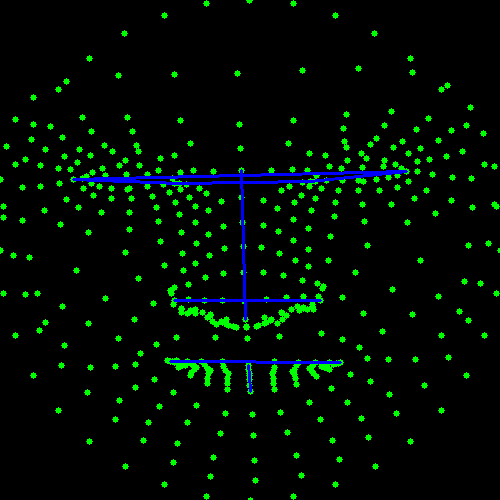

In [11]:
canvas_width = 500
canvas_height = 500
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

def scale_landmark(landmark):
    return int(landmark[0] * canvas_width), int(landmark[1] * canvas_height)

def get_deformed_landmark(index):
    return np.array(deformed_landmarks[index])

# Draw deformed landmarks
for lm in deformed_landmarks:
    cv2.circle(canvas, scale_landmark(lm), 3, (0, 255, 0), -1)

def draw_line(start_index, end_index, color=(255, 0, 0), thickness=2):
    start_point = scale_landmark(get_deformed_landmark(start_index))
    end_point = scale_landmark(get_deformed_landmark(end_index))
    cv2.line(canvas, start_point, end_point, color, thickness)

# Draw parameter lines
for param_dict in parameters:
    key = list(param_dict.keys())[0]
    indices = param_dict[key]
    draw_line(indices["first_point"], indices["second_point"])

cv2_imshow(canvas)